<a href="https://colab.research.google.com/github/amina-nasrin/AI-based-Netwrok-Security-System/blob/main/Network5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

file_path = "karate_unweighted_edge_list.txt"
with open(file_path, "r") as f:
    next(f)
    graph = nx.parse_edgelist(f, nodetype=int)

plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Karate Club Graph (Unweighted)")
plt.show()


In [ ]:
def kernighan_lin_partitioning(graph):
    nodes = list(graph.nodes)
    partition_A = set(nodes[:len(nodes) // 2])
    partition_B = set(nodes[len(nodes) // 2:])

    def calculate_external_internal_costs(node, partition, opposite_partition):
        external_cost = sum(graph[node][neighbor].get('weight', 1) for neighbor in graph[node] if neighbor in opposite_partition)
        internal_cost = sum(graph[node][neighbor].get('weight', 1) for neighbor in graph[node] if neighbor in partition)
        return external_cost, internal_cost

    improved = True
    while improved:
        improved = False
        max_gain = float('-inf')
        swap = None

        for a in partition_A:
            for b in partition_B:
                E_a, I_a = calculate_external_internal_costs(a, partition_A, partition_B)
                E_b, I_b = calculate_external_internal_costs(b, partition_B, partition_A)
                w_a_b = graph[a][b].get('weight', 0) if b in graph[a] else 0
                gain = (E_a - I_a) + (E_b - I_b) - 2 * w_a_b

                if gain > max_gain:
                    max_gain = gain
                    swap = (a, b)

        if max_gain > 0 and swap is not None:
            a, b = swap
            partition_A.remove(a)
            partition_A.add(b)
            partition_B.remove(b)
            partition_B.add(a)
            improved = True

    return partition_A, partition_B

import networkx as nx
import matplotlib.pyplot as plt

with open("karate_weighted_edge_list.txt", "r") as f:
    next(f)
    graph = nx.read_weighted_edgelist(f, nodetype=int)

with open("karate_unweighted_edge_list.txt", "r") as f:
    next(f)
    graph_un = nx.read_weighted_edgelist(f, nodetype=int)

partition_A, partition_B = kernighan_lin_partitioning(graph)
partition_A_un, partition_B_un = kernighan_lin_partitioning(graph_un)

color_map = ['red' if node in partition_A else 'blue' for node in graph]
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=True, node_color=color_map, edge_color='gray', node_size=500, font_size=10)
plt.title("Kernighan-Lin Partitioning for Weighted Graph")
plt.show()

color_map_un = ['red' if node in partition_A_un else 'blue' for node in graph_un]
plt.figure(figsize=(8, 8))
nx.draw(graph_un, with_labels=True, node_color=color_map_un, edge_color='gray', node_size=500, font_size=10)
plt.title("Kernighan-Lin Partitioning for Unweighted Graph")
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

partition_A, partition_B = nx.algorithms.community.kernighan_lin_bisection(graph)

color_map = ['red' if node in partition_A else 'blue' for node in graph]
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=True, node_color=color_map, edge_color='gray', node_size=500, font_size=10)
plt.title("Kernighan-Lin Partitioning (NetworkX Implementation)")
plt.show()


Communities (Weighted): [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Communities (Unweighted): [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]


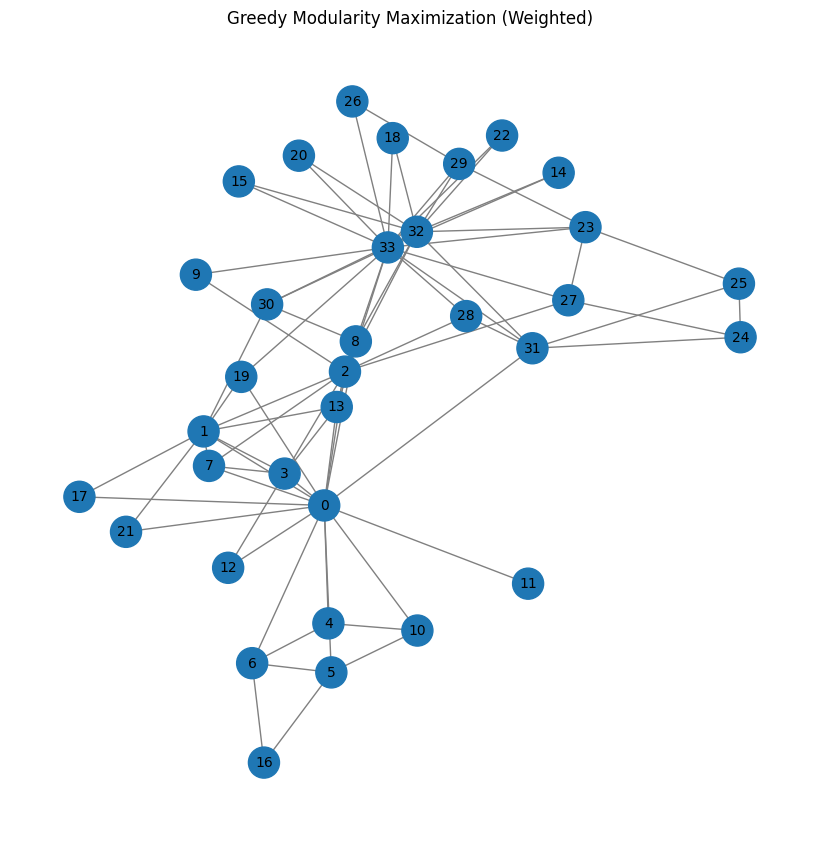

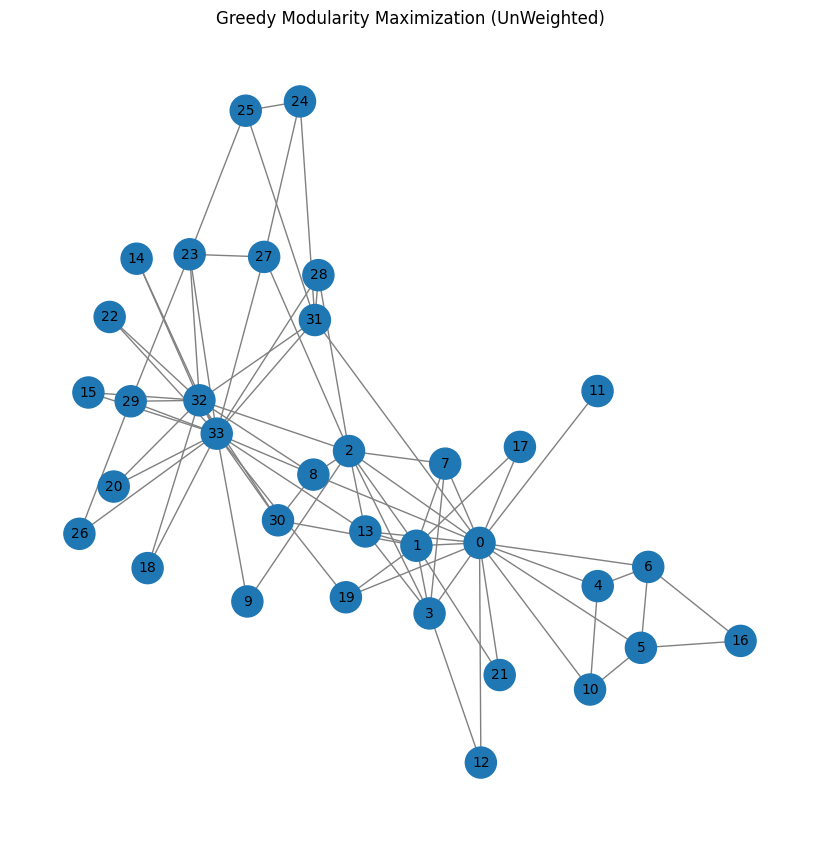

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import modularity

def greedy_modularity_maximization(graph):
    communities = [{node} for node in graph.nodes]

    while len(communities) > 1:
        max_increase = float('-inf')
        merge_pair = None

        for i in range(len(communities)):
            for j in range(i + 1, len(communities)):
                merged = communities[i] | communities[j]
                temp_communities = communities[:i] + communities[i+1:j] + communities[j+1:] + [merged]

                try:
                    mod = modularity(graph, temp_communities)
                    if mod > max_increase:
                        max_increase = mod
                        merge_pair = (i, j)
                except:
                    continue

        if merge_pair is None:
            break

        i, j = merge_pair
        communities[i] = communities[i] | communities[j]
        del communities[j]

    return [set(comm) for comm in communities]

file_path = "karate_unweighted_edge_list.txt"
with open(file_path, "r") as f:
    next(f)
    graph = nx.parse_edgelist(f, nodetype=int)

communities = greedy_modularity_maximization(graph)
communities_un = greedy_modularity_maximization(graph_un)

print("Communities (Weighted):", communities)
print("Communities (Unweighted):", communities_un)

node_colors = {}
for idx, community in enumerate(communities):
    for node in community:
        node_colors[node] = idx

for idx, community_un in enumerate(communities_un):
    for node in community_un:
        node_colors[node] = idx

colors = [node_colors[node] for node in graph.nodes]
colors_un = [node_colors[node] for node in graph_un.nodes]
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=True, node_color=colors, cmap=plt.cm.tab10, edge_color='gray', node_size=500, font_size=10)
plt.title("Greedy Modularity Maximization (Weighted)")
plt.show()

plt.figure(figsize=(8, 8))
nx.draw(graph_un, with_labels=True, node_color=colors_un, cmap=plt.cm.tab10, edge_color='gray', node_size=500, font_size=10)
plt.title("Greedy Modularity Maximization (UnWeighted)")
plt.show()

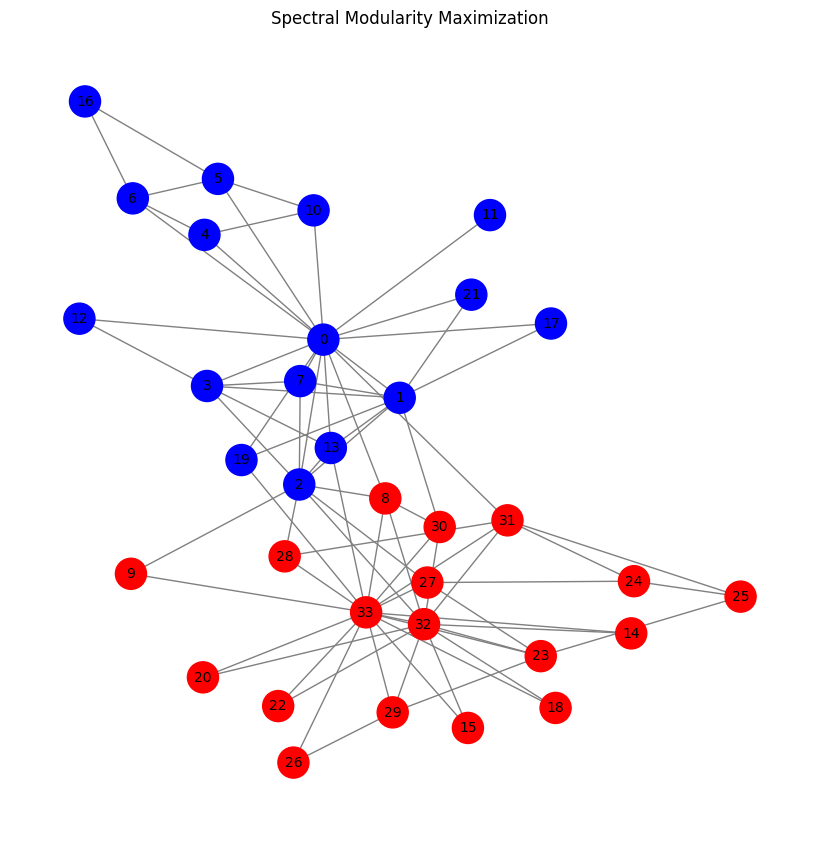

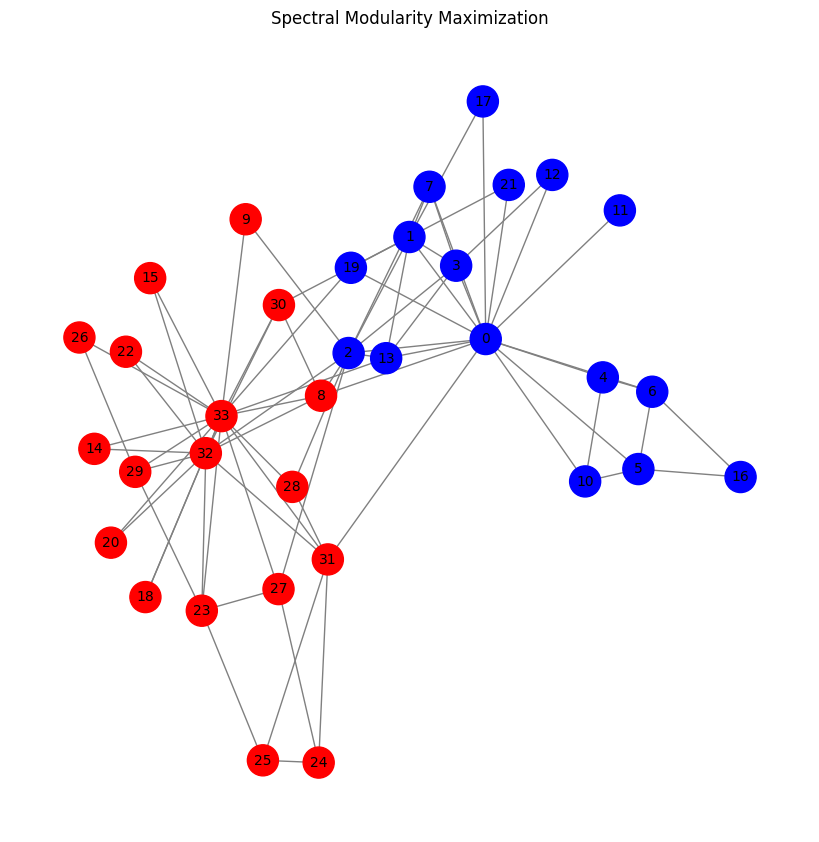

In [ ]:
import numpy as np
from scipy.sparse.linalg import eigsh

def spectral_modularity(graph):
    n = len(graph)
    A = nx.adjacency_matrix(graph).todense()
    degrees = np.sum(A, axis=1)
    m = np.sum(degrees) / 2
    B = A - np.outer(degrees, degrees) / (2 * m)

    eigval, eigvec = eigsh(B, k=1, which='LA')
    eigvec = eigvec.flatten()

    part_A = {node for i, node in enumerate(graph) if eigvec[i] >= 0}
    part_B = set(graph.nodes) - part_A

    return part_A, part_B

part_A_un, part_B_un = spectral_modularity(graph_un)
part_A, part_B = spectral_modularity(graph)

color_map = ['red' if node in part_A else 'blue' for node in graph]
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=True, node_color=color_map, edge_color='gray', node_size=500, font_size=10)
plt.title("Spectral Modularity Maximization")
plt.show()

color_map_un = ['red' if node in part_A else 'blue' for node in graph_un]
plt.figure(figsize=(8, 8))
nx.draw(graph_un, with_labels=True, node_color=color_map_un, edge_color='gray', node_size=500, font_size=10)
plt.title("Spectral Modularity Maximization")
plt.show()
